The purpose of this file is to analyze the .txt files exported by the ATEX software

I want to plot my data in a way that is comparable to how Ernould chapter 4 plots his database

Plots 

When disorientation angle is varied: 
- Fig 2a - Max and Min error of von mises strain versus disorientation 
- Fig 9a  - Max relative error versus disortination, plotted for each of the von mises strain values as a line plot 
- Fig 9c - Relative error versus disorientation for each of the components as a scatter plot 


When strain is varied: 
- Fig 2b - Max and Min error of disorientation angle versus strain 
- Fig 9b - see above 

###  Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import conversions
import os
import ErnouldsMethod

Before you can read in the file make sure that the line DATA BEGIN is commented

# Inputs

In [2]:
#EMEBSD version 
#file that contains all of the deformation gradient data exported from Al_results visulalization
filename = '/Users/crestiennedechaine/Scripts/DIC-HREBSD/DIC-HREBSD/results/PC_Sensitivity_wRef_Jan122026_npyfiles/PC_Sensitivity_wRef_homographies_Jan122026.npy'


#How many Rows and Columns were in the original EBSD scan?
Rows = 40
Columns = 12

#results folder path
foldername = f'/Users/crestiennedechaine/Scripts/DIC-HREBSD/DIC-HREBSD/results/PC_Sensitivity_wRef_Jan122026/'

os.makedirs(foldername, exist_ok=True)

# need pattern center information - to determine the np.array change

#converting from sample 

# Conversion to Homography to Strain

In [3]:
h = np.load(
        filename
    )

#make a copy of h to manipulate
h_calc = h.copy()

#h is in column major order convert h to row major order for comparison
h11 = h[:, 0]
h12 = h[:, 1]
h13 = h[:, 2]
h21 = h[:, 3]
h22 = h[:, 4]
h23 = h[:, 5]
h31 = h[:, 6]
h32 = h[:, 7]

#restack h in row major order
h_calc = np.stack((h11, h12, h13, h21, h22, h23, h31, h32), axis=1)


F = conversions.h2F(h_calc, np.array([0, 0, 800]))

#pring F shape
print(F.shape)
epsilon, omega = conversions.F2strain(F)



(480, 3, 3)


This is the code to read in a .csv file generated by pyHREBSD

In [4]:

e11 = epsilon[:, 0, 0]
e12 = epsilon[:, 0, 1]
e13 = epsilon[:, 0, 2]
e22 = epsilon[:, 1, 1]
e23 = epsilon[:, 1, 2]
e33 = epsilon[:, 2, 2]
w13 = omega[:, 0, 2]
w21 = omega[:, 1, 0]
w32 = omega[:, 2, 1]

#convert the rotation components to degrees
w13 = np.degrees(w13)
w21 = np.degrees(w21)
w32 = np.degrees(w32)


In [5]:
#reshape all components to Rows x Columns
e11 = e11.reshape((Rows, Columns))
e12 = e12.reshape((Rows, Columns))
e13 = e13.reshape((Rows, Columns))
e22 = e22.reshape((Rows, Columns))
e23 = e23.reshape((Rows, Columns))
e33 = e33.reshape((Rows, Columns))
w13 = w13.reshape((Rows, Columns))
w21 = w21.reshape((Rows, Columns))
w32 = w32.reshape((Rows, Columns))


# Plotting

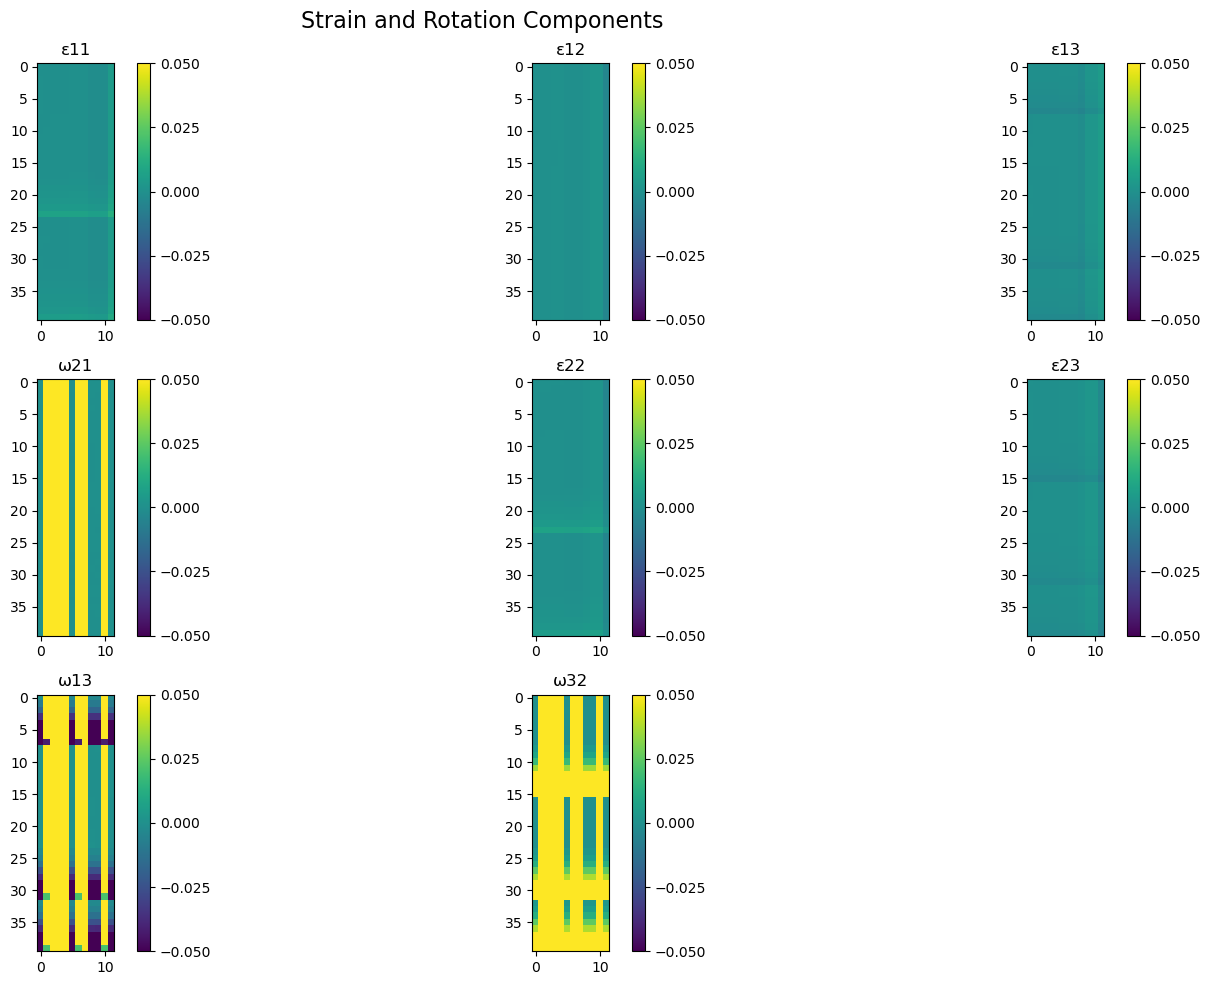

In [6]:

#plot strain components as subplots
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

vmin = -5e-2
vmax = 5e-2

ax[0, 0].imshow(e11, cmap="viridis", vmin=vmin, vmax=vmax)
cb1 = fig.colorbar(ax[0,0].imshow(e11, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[0,0])
cb1.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[0, 0].set_title("ε11")
ax[0, 1].imshow(e12, cmap="viridis", vmin=vmin, vmax=vmax)
cb2 = fig.colorbar(ax[0,1].imshow(e12, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[0,1])
cb2.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[0, 1].set_title("ε12")
ax[0, 2].imshow(e13, cmap="viridis", vmin=vmin, vmax=vmax)
cb3 = fig.colorbar(ax[0,2].imshow(e13, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[0,2])
cb3.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[0, 2].set_title("ε13")
ax[1, 0].imshow(w21, cmap="viridis", vmin=vmin, vmax=vmax)
cb4 = fig.colorbar(ax[1,0].imshow(w21, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[1,0])
cb4.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[1, 0].set_title("ω21")
ax[1, 1].imshow(e22, cmap="viridis", vmin=vmin, vmax=vmax)
cb5 = fig.colorbar(ax[1,1].imshow(e22, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[1,1])
cb5.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[1, 1].set_title("ε22")
ax[1, 2].imshow(e23, cmap="viridis", vmin=vmin, vmax=vmax)
cb6 = fig.colorbar(ax[1,2].imshow(e23, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[1,2])
cb6.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[1, 2].set_title("ε23")
ax[2, 0].imshow(w13, cmap="viridis", vmin=vmin, vmax=vmax)
cb7 = fig.colorbar(ax[2,0].imshow(w13, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[2,0])
cb7.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[2, 0].set_title("ω13")
ax[2, 1].imshow(w32, cmap="viridis", vmin=vmin, vmax=vmax)
cb8 = fig.colorbar(ax[2,1].imshow(w32, cmap="viridis", vmin=vmin, vmax=vmax), ax=ax[2,1])
cb8.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
ax[2, 1].set_title("ω32")
ax[2, 2].axis("off")
#set a supertitle
fig.suptitle(f"Strain and Rotation Components", fontsize=16)

plt.tight_layout()
plt.savefig(f"{foldername}/Strain_and_Rotation_Calculated - DETECTOR REFERENCE FRAME.png")

In [7]:
#also save each subplot individually
components = {
    "e11": e11,
    "e12": e12, 
    "e13": e13,
    "e22": e22,
    "e23": e23,
    "e33": e33,
    "w13": w13,
    "w21": w21,
    "w32": w32
}

for name, data in components.items():
    plt.figure(figsize=(6,5))
    plt.imshow(data, cmap="viridis", vmin=vmin, vmax=vmax)
    cb = plt.colorbar()
    cb.set_ticks([-5e-2, -2.5e-2, 0, 2.5e-2, 5e-2])
    plt.title(f"{name} Component")
    plt.savefig(f"{foldername}/{name}_Calculated - DETECTOR REFERENCE FRAME.png")
    plt.close()

# Reading in True Strain Values

In [8]:
# EMEBSDfilename = '/Users/crestiennedechaine/Scripts/DIC-HREBSD/DIC-HREBSD/Inputs/EBSDpattern_Al_July222025.h5'
Testcasesfilename = '/Users/crestiennedechaine/Scripts/DIC-HREBSD/DIC-HREBSD/Inputs/PC_Sensitivity.csv'

# outputfile = '/Users/crestiennedechaine/Scripts/DIC-HREBSD/DIC-HREBSD/Inputs/E11_notNormalized_Dec42025.up2'
# EMEBSD_pattern = ErnouldsMethod.read_EMEBSD(EMEBSDfilename)

# #determine the reference pattern coordinates need to pass in PC and detector shape
# ref_coords = ErnouldsMethod.pattern_coords(Ernould_PC, detector_shape)
#             #Read in the test cases from a csv file
#             #load in the testcases
testcases_data = np.genfromtxt(Testcasesfilename, delimiter=',', encoding='utf-8-sig')
            #breaking the testcases data into euler angles and strain/rotation components
        
w_true = testcases_data[:, 0:3]
e_true = testcases_data[:, 3:]


Each row corresponds to a different pattern center


In [9]:
x_axis = np.array([0.1, 0.25, 0.5, 1.0, 1.5, 2.0, 3.0, 6.0]) # the possible PC values 

#extract the first 8 columns of e as the test cases for the different PCs
e11_pcx = e11[0:8, :]
e12_pcx = e12[0:8, :]
e13_pcx = e13[0:8, :]
e22_pcx = e22[0:8, :]
e23_pcx = e23[0:8, :]
e33_pcx = e33[0:8, :]
w13_pcx = w13[0:8, :]
w21_pcx = w21[0:8, :]
w32_pcx = w32[0:8, :]

e11_pcy = e11[8:16, :]
e12_pcy = e12[8:16, :]
e13_pcy = e13[8:16, :]
e22_pcy = e22[8:16, :]
e23_pcy = e23[8:16, :]
e33_pcy = e33[8:16, :]
w13_pcy = w13[8:16, :]
w21_pcy = w21[8:16, :]
w32_pcy = w32[8:16, :]

e11_dd = e11[16:24, :]
e12_dd = e12[16:24, :]
e13_dd = e13[16:24, :]
e22_dd = e22[16:24, :]
e23_dd = e23[16:24, :]
e33_dd = e33[16:24, :]
w13_dd = w13[16:24, :]
w21_dd = w21[16:24, :]
w32_dd = w32[16:24, :]

e11_pcx_and_pcy = e11[24:32, :]
e12_pcx_and_pcy = e12[24:32, :]
e13_pcx_and_pcy = e13[24:32, :]
e22_pcx_and_pcy = e22[24:32, :]
e23_pcx_and_pcy = e23[24:32, :]
e33_pcx_and_pcy = e33[24:32, :]
w13_pcx_and_pcy = w13[24:32, :]
w21_pcx_and_pcy = w21[24:32, :]
w32_pcx_and_pcy = w32[24:32, :]

e11_allpc = e11[32:40, :]
e12_allpc = e12[32:40, :]
e13_allpc = e13[32:40, :]
e22_allpc = e22[32:40, :]
e23_allpc = e23[32:40, :]
e33_allpc = e33[32:40, :]
w13_allpc = w13[32:40, :]
w21_allpc = w21[32:40, :]
w32_allpc = w32[32:40, :]


#print the shape of each extracted component
print("e11_pcx shape: ", e11_pcx.shape)
print("e12_pcx shape: ", e12_pcx.shape)






e11_pcx shape:  (8, 12)
e12_pcx shape:  (8, 12)


# Finding Relative Error

In [10]:
print('e_true shape :', e_true.shape)

e11_true = e_true[:, 0]
e12_true = e_true[:, 1]
e13_true = e_true[:, 2]
e22_true = e_true[:, 4]
e_23_true = e_true[:, 5]

w32_true = w_true[:, 0]
w13_true = w_true[:, 1]
w21_true = w_true[:, 2]

print(w32_true)
print(w32_pcx[:, -1])


e_true shape : (12, 9)
[0.    0.173 0.346 0.577 0.866 0.    0.173 0.577 0.    0.    0.173 0.   ]
[-3.62737508e-05 -6.09041617e-05 -1.29327354e-05 -7.32629894e-05
 -8.61653912e-05 -1.46656261e-04 -2.20021156e-04 -4.40786466e-04]


In [11]:
#print the shape of e11_pcx
print("e11_pcx shape: ", e11_pcx.shape)

# Verify true value shapes for broadcasting
assert e11_true.shape == (12,), f"Expected 12 true values for e11, got {e11_true.shape}"
assert e12_true.shape == (12,), f"Expected 12 true values for e12, got {e12_true.shape}"
assert e13_true.shape == (12,), f"Expected 12 true values for e13, got {e13_true.shape}"
assert e22_true.shape == (12,), f"Expected 12 true values for e22, got {e22_true.shape}"
assert e_23_true.shape == (12,), f"Expected 12 true values for e23, got {e_23_true.shape}"
assert w32_true.shape == (12,), f"Expected 12 true values for w32, got {w32_true.shape}"
assert w13_true.shape == (12,), f"Expected 12 true values for w13, got {w13_true.shape}"
assert w21_true.shape == (12,), f"Expected 12 true values for w21, got {w21_true.shape}"

#subtract the true values from the pcx values from each row in e11_pcx to get the error
# Explicit broadcasting: each row gets the same 12 true values subtracted
e11_pcx_error = np.abs(e11_pcx - e11_true.reshape(1, 12))
e12_pcx_error = np.abs(e12_pcx - e12_true.reshape(1, 12))
e13_pcx_error = np.abs(e13_pcx - e13_true.reshape(1, 12))
e22_pcx_error = np.abs(e22_pcx - e22_true.reshape(1, 12))
e23_pcx_error = np.abs(e23_pcx - e_23_true.reshape(1, 12))

w32_pcx_error = np.abs(w32_pcx - w32_true.reshape(1, 12))
w13_pcx_error = np.abs(w13_pcx - w13_true.reshape(1, 12))
w21_pcx_error = np.abs(w21_pcx - w21_true.reshape(1, 12))

e11_pcx shape:  (8, 12)


In [12]:
#find the same for pcy
e11_pcy_error = np.abs(e11_pcy - e11_true.reshape(1, 12))
e12_pcy_error = np.abs(e12_pcy - e12_true.reshape(1, 12))
e13_pcy_error = np.abs(e13_pcy - e13_true.reshape(1, 12))
e22_pcy_error = np.abs(e22_pcy - e22_true.reshape(1, 12))
e23_pcy_error = np.abs(e23_pcy - e_23_true.reshape(1, 12))
w32_pcy_error = np.abs(w32_pcy - w32_true.reshape(1, 12))
w13_pcy_error = np.abs(w13_pcy - w13_true.reshape(1, 12))
w21_pcy_error = np.abs(w21_pcy - w21_true.reshape(1, 12))

#and for dd
e11_dd_error = np.abs(e11_dd - e11_true.reshape(1, 12))
e12_dd_error = np.abs(e12_dd - e12_true.reshape(1, 12))
e13_dd_error = np.abs(e13_dd - e13_true.reshape(1, 12))
e22_dd_error = np.abs(e22_dd - e22_true.reshape(1, 12))
e23_dd_error = np.abs(e23_dd - e_23_true.reshape(1, 12))
w32_dd_error = np.abs(w32_dd - w32_true.reshape(1, 12))
w13_dd_error = np.abs(w13_dd - w13_true.reshape(1, 12))
w21_dd_error = np.abs(w21_dd - w21_true.reshape(1, 12))

#and for pcx_and_pcy
e11_pcx_and_pcy_error = np.abs(e11_pcx_and_pcy - e11_true.reshape(1, 12))
e12_pcx_and_pcy_error = np.abs(e12_pcx_and_pcy - e12_true.reshape(1, 12))
e13_pcx_and_pcy_error = np.abs(e13_pcx_and_pcy - e13_true.reshape(1, 12))
e22_pcx_and_pcy_error = np.abs(e22_pcx_and_pcy - e22_true.reshape(1, 12))
e23_pcx_and_pcy_error = np.abs(e23_pcx_and_pcy - e_23_true.reshape(1, 12))
w32_pcx_and_pcy_error = np.abs(w32_pcx_and_pcy - w32_true.reshape(1, 12))
w13_pcx_and_pcy_error = np.abs(w13_pcx_and_pcy - w13_true.reshape(1, 12))
w21_pcx_and_pcy_error = np.abs(w21_pcx_and_pcy - w21_true.reshape(1, 12))

#and for allpc
e11_allpc_error = np.abs(e11_allpc - e11_true.reshape(1, 12))
e12_allpc_error = np.abs(e12_allpc - e12_true.reshape(1, 12))
e13_allpc_error = np.abs(e13_allpc - e13_true.reshape(1, 12))
e22_allpc_error = np.abs(e22_allpc - e22_true.reshape(1, 12))
e23_allpc_error = np.abs(e23_allpc - e_23_true.reshape(1, 12))
w32_allpc_error = np.abs(w32_allpc - w32_true.reshape(1, 12))   
w13_allpc_error = np.abs(w13_allpc - w13_true.reshape(1, 12))
w21_allpc_error = np.abs(w21_allpc - w21_true.reshape(1, 12))

# Plotting the Values

# Plotting PCx

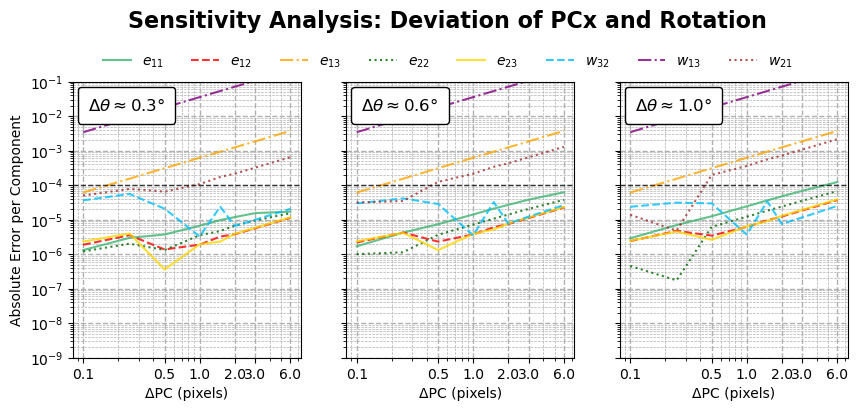

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',
}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_pcx_error, e12_pcx_error, e13_pcx_error,
          e22_pcx_error, e23_pcx_error, 
          w32_pcx_error, w13_pcx_error, w21_pcx_error]

column = [1, 2, 3]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], 
                            color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], 
                            color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e-1)


    ax[ax_idx].set_xlabel("ΔPC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error per Component")
        #the title of the leftmost subplot
        title = rf"$ \Delta \theta \approx 0.3 \degree$"

    elif ax_idx == 1:
        title = r"$ \Delta \theta \approx 0.6 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \Delta \theta \approx 1.0 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of PCx and Rotation", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_PCx_and_Rotation.png', dpi=300)
plt.show()

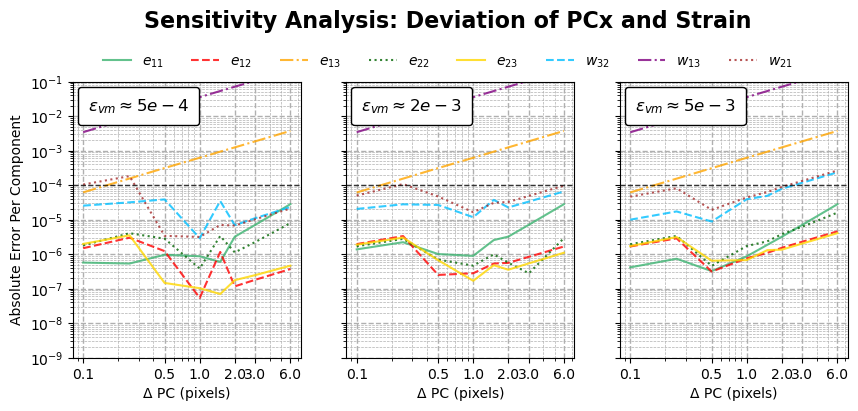

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',
}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_pcx_error, e12_pcx_error, e13_pcx_error,
          e22_pcx_error, e23_pcx_error, 
            w32_pcx_error, w13_pcx_error, w21_pcx_error]

column = [5, 8, 9]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], 
                            color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], 
                            color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e-1)


    ax[ax_idx].set_xlabel("Δ PC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error Per Component")
        #the title of the leftmost subplot
        title = r"$ \epsilon_{vm} \approx 5e-4$"

    elif ax_idx == 1:
        title = r"$ \epsilon_{vm} \approx 2e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \epsilon_{vm} \approx 5e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of PCx and Strain", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_PCx_and_Strain.png', dpi=300)
plt.show()

# Plotting PCy 

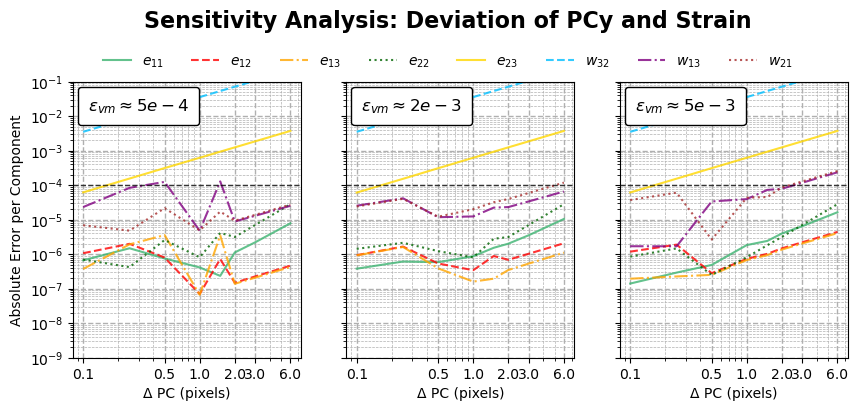

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',

}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_pcy_error, e12_pcy_error, e13_pcy_error,
          e22_pcy_error, e23_pcy_error, 
          w32_pcy_error, w13_pcy_error, w21_pcy_error]

column = [5, 8, 9]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e-1)


    ax[ax_idx].set_xlabel("Δ PC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error per Component")
        #the title of the leftmost subplot
        title = r"$ \epsilon_{vm} \approx 5e-4$"

    elif ax_idx == 1:
        title = r"$ \epsilon_{vm} \approx 2e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \epsilon_{vm} \approx 5e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of PCy and Strain", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_PCy_and_Strain.png', dpi=300)
plt.show()

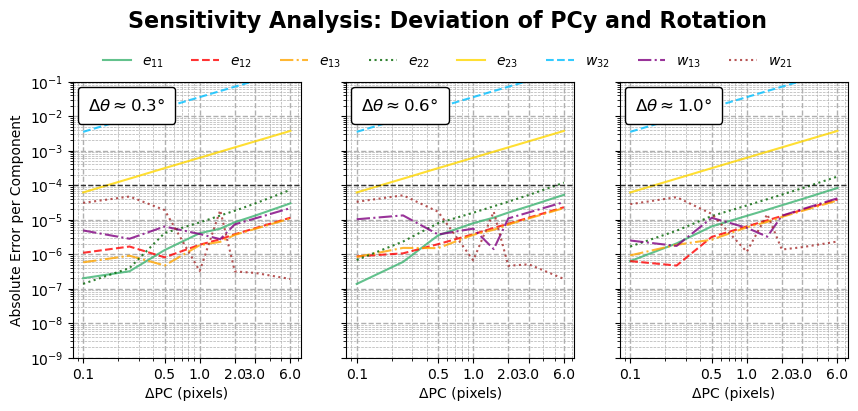

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',

}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_pcy_error, e12_pcy_error, e13_pcy_error,
          e22_pcy_error, e23_pcy_error, 
          w32_pcy_error, w13_pcy_error, w21_pcy_error]

column = [1, 2, 3]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e-1)


    ax[ax_idx].set_xlabel("ΔPC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error per Component")
        #the title of the leftmost subplot
        title = rf"$ \Delta \theta \approx 0.3 \degree$"

    elif ax_idx == 1:
        title = r"$ \Delta \theta \approx 0.6 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \Delta \theta \approx 1.0 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of PCy and Rotation", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_PCy_and_Rotation.png', dpi=300)
plt.show()

# DD

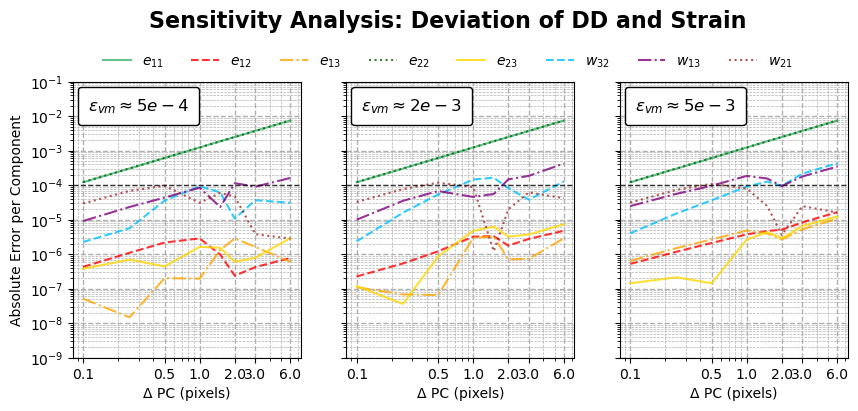

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',

}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_dd_error, e12_dd_error, e13_dd_error,
          e22_dd_error, e23_dd_error, 
          w32_dd_error, w13_dd_error, w21_dd_error]

column = [5, 8, 9]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e-1)


    ax[ax_idx].set_xlabel("Δ PC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error per Component")
        #the title of the leftmost subplot
        title = r"$ \epsilon_{vm} \approx 5e-4$"

    elif ax_idx == 1:
        title = r"$ \epsilon_{vm} \approx 2e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \epsilon_{vm} \approx 5e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of DD and Strain", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_DD_and_Strain.png', dpi=300)
plt.show()

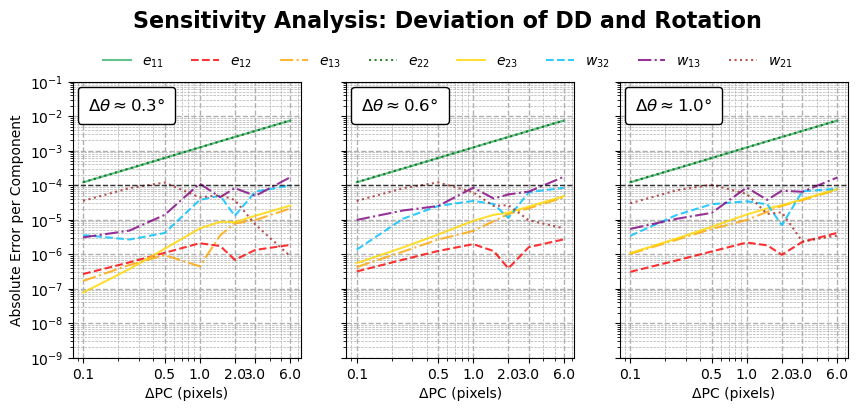

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',

}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_dd_error, e12_dd_error, e13_dd_error,
          e22_dd_error, e23_dd_error, 
          w32_dd_error, w13_dd_error, w21_dd_error]

column = [1, 2, 3]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e-1)


    ax[ax_idx].set_xlabel("ΔPC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error per Component")
        #the title of the leftmost subplot
        title = rf"$ \Delta \theta \approx 0.3 \degree$"

    elif ax_idx == 1:
        title = r"$ \Delta \theta \approx 0.6 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \Delta \theta \approx 1.0 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of DD and Rotation", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_DD_and_Rotation.png', dpi=300)
plt.show()

# PCx and PCy

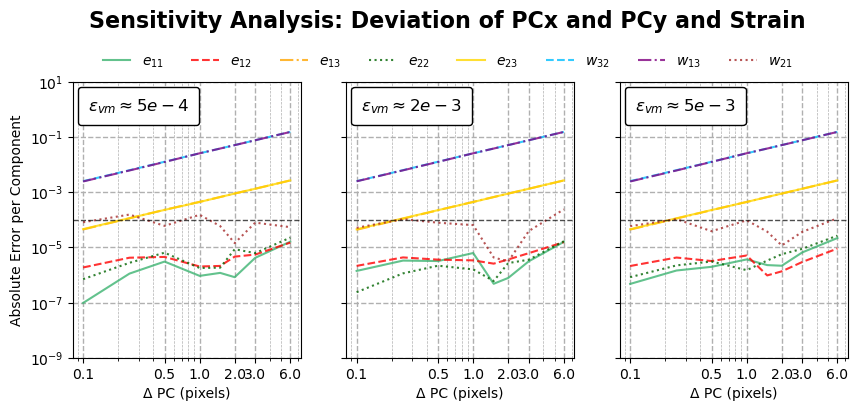

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',

}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_pcx_and_pcy_error, e12_pcx_and_pcy_error, e13_pcx_and_pcy_error,
          e22_pcx_and_pcy_error, e23_pcx_and_pcy_error, 
          w32_pcx_and_pcy_error, w13_pcx_and_pcy_error, w21_pcx_and_pcy_error]

column = [5, 8, 9]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e1)


    ax[ax_idx].set_xlabel("Δ PC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error per Component")
        #the title of the leftmost subplot
        title = r"$ \epsilon_{vm} \approx 5e-4$"

    elif ax_idx == 1:
        title = r"$ \epsilon_{vm} \approx 2e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \epsilon_{vm} \approx 5e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of PCx and PCy and Strain", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_PCxPCy_and_Strain.png', dpi=300)
plt.show()

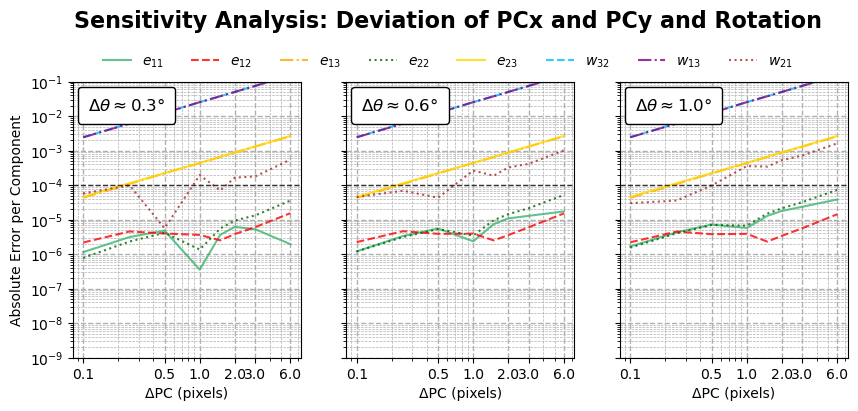

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',

}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_pcx_and_pcy_error, e12_pcx_and_pcy_error, e13_pcx_and_pcy_error,
          e22_pcx_and_pcy_error, e23_pcx_and_pcy_error, 
          w32_pcx_and_pcy_error, w13_pcx_and_pcy_error, w21_pcx_and_pcy_error]

column = [1, 2, 3]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e-1)


    ax[ax_idx].set_xlabel("ΔPC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error per Component")
        #the title of the leftmost subplot
        title = rf"$ \Delta \theta \approx 0.3 \degree$"

    elif ax_idx == 1:
        title = r"$ \Delta \theta \approx 0.6 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \Delta \theta \approx 1.0 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of PCx and PCy and Rotation", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_PCxPCy_and_Rotation.png', dpi=300)
plt.show()

# All PC

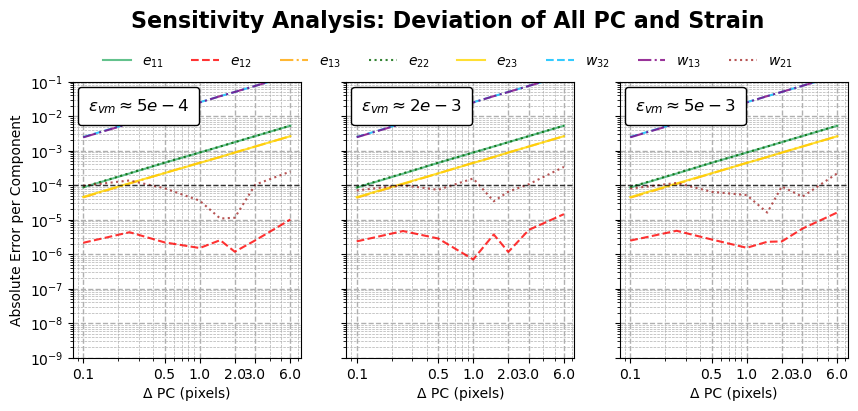

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',

}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_allpc_error, e12_allpc_error, e13_allpc_error,
          e22_allpc_error, e23_allpc_error, 
          w32_allpc_error, w13_allpc_error, w21_allpc_error]

column = [5, 8, 9]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e-1)


    ax[ax_idx].set_xlabel("Δ PC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error per Component")
        #the title of the leftmost subplot
        title = r"$ \epsilon_{vm} \approx 5e-4$"

    elif ax_idx == 1:
        title = r"$ \epsilon_{vm} \approx 2e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \epsilon_{vm} \approx 5e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of All PC and Strain", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_AllPC_and_Strain.png', dpi=300)
plt.show()

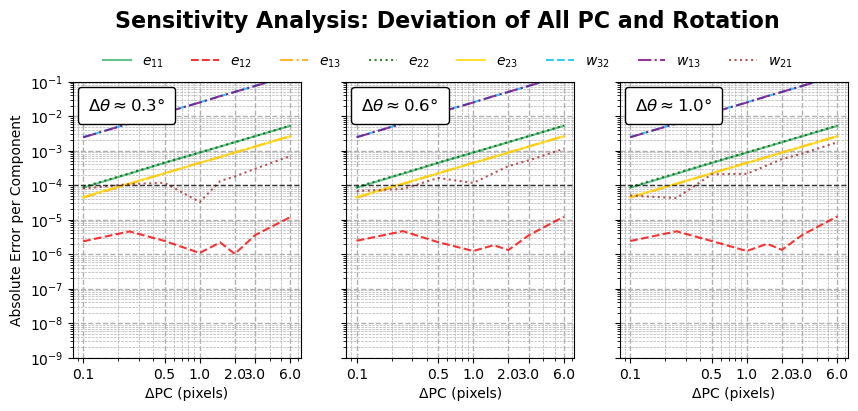

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',

}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_allpc_error, e12_allpc_error, e13_allpc_error,
          e22_allpc_error, e23_allpc_error, 
          w32_allpc_error, w13_allpc_error, w21_allpc_error]

column = [1, 2, 3]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e-1)


    ax[ax_idx].set_xlabel("ΔPC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error per Component")
        #the title of the leftmost subplot
        title = rf"$ \Delta \theta \approx 0.3 \degree$"

    elif ax_idx == 1:
        title = r"$ \Delta \theta \approx 0.6 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \Delta \theta \approx 1.0 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of All PC and Rotation", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_AllPC_and_Rotation.png', dpi=300)
plt.show()

# Back Correcting For PC deviation

## Step 0: Know the PC deviations

In [23]:
delpc = np.array([0.1, 0.25, 0.5, 1.0, 1.5, 2.0, 3.0, 6.0]) # the possible PC values 

## Step 1: Construct (TS)^(-1)

Note this is simplified by the fact that the x01 and xo2 are 0

PC x

In [24]:
#inputs -----
alpha = np.ones(len(delpc)) # no change in the pc width
delx = delpc  # the change in pcx
dely = np.zeros(len(delpc))  # no change in pcy
TS_inv_pcx = np.zeros((3,3,len(delpc)))  # preallocate the inverse transformation matrix array

for i in range(len(delpc)):
    TS = np.array(([alpha[i], 0, (-1*delx[i]/alpha[i])], [0, alpha[i], (-1*dely[i]/alpha[i])], [0, 0, 1]))  # the three theta values
    #find the inverse of TS
    TS_inv_pcx[:,:,i] = np.linalg.inv(TS)



PC Y 

In [25]:
#inputs -----
alpha = np.ones(len(delpc)) # no change in the pc width
dely = delpc  # the change in pcx
delx = np.zeros(len(delpc))  # no change in pcy
TS_inv_pcy = np.zeros((3,3,len(delpc)))  # preallocate the inverse transformation matrix array

for i in range(len(delpc)):
    TS = np.array(([alpha[i], 0, -1*delx[i]/alpha[i]], [0, alpha[i], -1*dely[i]/alpha[i]], [0, 0, 1]))  # the three theta values
    #find the inverse of TS
    TS_inv_pcy[:,:,i] = np.linalg.inv(TS)



DD 

In [26]:
#inputs -----
alpha = 800 - delpc/800  # slight change in the pc width
delx = np.zeros(len(delpc))  # the change in pcx
dely = np.zeros(len(delpc))  # no change in pcy
TS_inv_dd = np.zeros((3,3,len(delpc)))  # preallocate the inverse transformation matrix array

for i in range(len(delpc)):
    TS = np.array(([alpha[i], 0, -1*delx[i]/alpha[i]], [0, alpha[i], -1*dely[i]/alpha[i]], [0, 0, 1]))  # the three theta values
    #find the inverse of TS
    TS_inv_dd[:,:,i] = np.linalg.inv(TS)



In [27]:
#inputs -----
delpc_new = np.sqrt((delpc)**2/2)

alpha = np.ones(len(delpc)) # no change in the pc width
delx = delpc_new # the change in pcx
dely = delpc_new  # no change in pcy
TS_inv_pcx_pcy = np.zeros((3,3,len(delpc)))  # preallocate the inverse transformation matrix array

for i in range(len(delpc)):
    TS = np.array(([alpha[i], 0, -1*delx[i]/alpha[i]], [0, alpha[i], -1*dely[i]/alpha[i]], [0, 0, 1]))  # the three theta values
    #find the inverse of TS
    TS_inv_pcx_pcy[:,:,i] = np.linalg.inv(TS)



All PC vals

In [28]:
#inputs -----
alpha = (800 - delpc_new)/800  # slight change in the pc width
delx = delpc_new # the change in pcx
dely = delpc_new  # no change in pcy
TS_inv_allpc = np.zeros((3,3,len(delpc)))  # preallocate the inverse transformation matrix array

for i in range(len(delpc)):
    TS = np.array(([alpha[i], 0, -1*delx[i]/alpha[i]], [0, alpha[i], -1*dely[i]/alpha[i]], [0, 0, 1]))  # the three theta values
    #find the inverse of TS
    TS_inv_allpc[:,:,i] = np.linalg.inv(TS)

In [29]:
#combine all 40 TS matrices into a single 3D array
TS_matrices = np.concatenate((TS_inv_pcx, TS_inv_pcy, TS_inv_dd, TS_inv_pcx_pcy, TS_inv_allpc), axis=2)

print("Transformation matrices prepared.")
print(TS_matrices.shape)  # should be (3, 3, 40)

Transformation matrices prepared.
(3, 3, 40)


## Step 2: Apply to the optimized homographies

In [30]:
# using h_calc which is the version I copied earlier 

print(h_calc.shape)

#add an additional column populated by ones to h_calc for the zero deformation case
w_calc = np.hstack((h_calc, np.zeros((h_calc.shape[0], 1))))  
#reshape w_calc to be an array of shape (Rows, Columns, 3, 3)
w_calc = w_calc.reshape(Rows, Columns, 3, 3)

w_corrected = np.zeros_like(w_calc)  # preallocate the corrected array
print (w_calc.shape)

for i in range(Rows):
    for j in range(Columns):
        #pull that row from w_calc and reshape to 3 by 3
        H = w_calc[i, j, :, :]  + np.eye(3)  # shape (3, 3)
        w_corrected[i, j , :, :] =(TS_matrices[:, :, i] @ H) - np.eye(3)  # initialize with original H

print(w_corrected[3, 4, :, :])  # print the corrected transformation matrix at row 3, column 4

#reshape w_corrected back to (Rows*Columns, 9)
w_corrected_reshaped = w_corrected.reshape(Rows * Columns, 9)

#drop the last column
h_corrected = w_corrected_reshaped[:, :8]





(480, 8)
(40, 12, 3, 3)
[[-3.01757494e-05 -1.43681188e-02  1.22677907e+01]
 [ 1.56154312e-02 -2.28337947e-05 -1.19190581e+01]
 [-1.88964662e-05  1.88940492e-05  0.00000000e+00]]


## Step 3: Recalc Strain and Rotation

In [31]:
F = conversions.h2F(h_corrected, np.array([0, 0, 800]))

#pring F shape
print(F.shape)
epsilon_corrected, omega_corrected = conversions.F2strain(F)

(480, 3, 3)


## Step 4: New Errors

In [32]:
e11_corrected = epsilon_corrected[:, 0, 0]
e12_corrected = epsilon_corrected[:, 0, 1]
e13_corrected = epsilon_corrected[:, 0, 2]
e22_corrected = epsilon_corrected[:, 1, 1]
e23_corrected = epsilon_corrected[:, 1, 2]
e33_corrected = epsilon_corrected[:, 2, 2]
w13_corrected = omega_corrected[:, 0, 2]
w21_corrected = omega_corrected[:, 1, 0]
w32_corrected = omega_corrected[:, 2, 1]

#convert the rotation components to degrees
w13_corrected = np.degrees(w13_corrected)
w21_corrected = np.degrees(w21_corrected)
w32_corrected = np.degrees(w32_corrected)

In [33]:
#reshape all components to Rows x Columns
e11_corrected = e11_corrected.reshape((Rows, Columns))
e12_corrected = e12_corrected.reshape((Rows, Columns))
e13_corrected = e13_corrected.reshape((Rows, Columns))
e22_corrected = e22_corrected.reshape((Rows, Columns))
e23_corrected = e23_corrected.reshape((Rows, Columns))
e33_corrected = e33_corrected.reshape((Rows, Columns))
w13_corrected = w13_corrected.reshape((Rows, Columns))
w21_corrected = w21_corrected.reshape((Rows, Columns))
w32_corrected = w32_corrected.reshape((Rows, Columns))

In [34]:
x_axis = np.array([0.1, 0.25, 0.5, 1.0, 1.5, 2.0, 3.0, 6.0]) # the possible PC values 

#extract the first 8 columns of e as the test cases for the different PCs
e11_pcx = e11_corrected[0:8, :]
e12_pcx = e12_corrected[0:8, :]
e13_pcx = e13_corrected[0:8, :]
e22_pcx = e22_corrected[0:8, :]
e23_pcx = e23_corrected[0:8, :]
e33_pcx = e33_corrected[0:8, :]
w13_pcx = w13_corrected[0:8, :]
w21_pcx = w21_corrected[0:8, :]
w32_pcx = w32_corrected[0:8, :]

e11_pcy = e11_corrected[8:16, :]
e12_pcy = e12_corrected[8:16, :]
e13_pcy = e13_corrected[8:16, :]
e22_pcy = e22_corrected[8:16, :]
e23_pcy = e23_corrected[8:16, :]
e33_pcy = e33_corrected[8:16, :]
w13_pcy = w13_corrected[8:16, :]
w21_pcy = w21_corrected[8:16, :]
w32_pcy = w32_corrected[8:16, :]

e11_dd = e11_corrected[16:24, :]
e12_dd = e12_corrected[16:24, :]
e13_dd = e13_corrected[16:24, :]
e22_dd = e22_corrected[16:24, :]
e23_dd = e23_corrected[16:24, :]
e33_dd = e33_corrected[16:24, :]
w13_dd = w13_corrected[16:24, :]
w21_dd = w21_corrected[16:24, :]
w32_dd = w32_corrected[16:24, :]

e11_pcx_and_pcy = e11_corrected[24:32, :]
e12_pcx_and_pcy = e12_corrected[24:32, :]
e13_pcx_and_pcy = e13_corrected[24:32, :]
e22_pcx_and_pcy = e22_corrected[24:32, :]
e23_pcx_and_pcy = e23_corrected[24:32, :]
e33_pcx_and_pcy = e33_corrected[24:32, :]
w13_pcx_and_pcy = w13_corrected[24:32, :]
w21_pcx_and_pcy = w21_corrected[24:32, :]
w32_pcx_and_pcy = w32_corrected[24:32, :]

e11_allpc = e11_corrected[32:40, :]
e12_allpc = e12_corrected[32:40, :]
e13_allpc = e13_corrected[32:40, :]
e22_allpc = e22_corrected[32:40, :]
e23_allpc = e23_corrected[32:40, :]
e33_allpc = e33_corrected[32:40, :]
w13_allpc = w13_corrected[32:40, :]
w21_allpc = w21_corrected[32:40, :]
w32_allpc = w32_corrected[32:40, :]


#print the shape of each extracted component
print("e11_pcx shape: ", e11_pcx.shape)
print("e12_pcx shape: ", e12_pcx.shape)


e11_pcx shape:  (8, 12)
e12_pcx shape:  (8, 12)


In [35]:
#print the shape of e11_pcx
print("e11_pcx shape: ", e11_pcx.shape)

# Verify true value shapes for broadcasting
assert e11_true.shape == (12,), f"Expected 12 true values for e11, got {e11_true.shape}"
assert e12_true.shape == (12,), f"Expected 12 true values for e12, got {e12_true.shape}"
assert e13_true.shape == (12,), f"Expected 12 true values for e13, got {e13_true.shape}"
assert e22_true.shape == (12,), f"Expected 12 true values for e22, got {e22_true.shape}"
assert e_23_true.shape == (12,), f"Expected 12 true values for e23, got {e_23_true.shape}"
assert w32_true.shape == (12,), f"Expected 12 true values for w32, got {w32_true.shape}"
assert w13_true.shape == (12,), f"Expected 12 true values for w13, got {w13_true.shape}"
assert w21_true.shape == (12,), f"Expected 12 true values for w21, got {w21_true.shape}"

#subtract the true values from the pcx values from each row in e11_pcx to get the error
# Explicit broadcasting: each row gets the same 12 true values subtracted
e11_pcx_error = np.abs(e11_pcx - e11_true.reshape(1, 12))
e12_pcx_error = np.abs(e12_pcx - e12_true.reshape(1, 12))
e13_pcx_error = np.abs(e13_pcx - e13_true.reshape(1, 12))
e22_pcx_error = np.abs(e22_pcx - e22_true.reshape(1, 12))
e23_pcx_error = np.abs(e23_pcx - e_23_true.reshape(1, 12))

w32_pcx_error = np.abs(w32_pcx - w32_true.reshape(1, 12))
w13_pcx_error = np.abs(w13_pcx - w13_true.reshape(1, 12))
w21_pcx_error = np.abs(w21_pcx - w21_true.reshape(1, 12))

e11_pcx shape:  (8, 12)


In [36]:
#find the same for pcy
e11_pcy_error = np.abs(e11_pcy - e11_true.reshape(1, 12))
e12_pcy_error = np.abs(e12_pcy - e12_true.reshape(1, 12))
e13_pcy_error = np.abs(e13_pcy - e13_true.reshape(1, 12))
e22_pcy_error = np.abs(e22_pcy - e22_true.reshape(1, 12))
e23_pcy_error = np.abs(e23_pcy - e_23_true.reshape(1, 12))
w32_pcy_error = np.abs(w32_pcy - w32_true.reshape(1, 12))
w13_pcy_error = np.abs(w13_pcy - w13_true.reshape(1, 12))
w21_pcy_error = np.abs(w21_pcy - w21_true.reshape(1, 12))

#and for dd
e11_dd_error = np.abs(e11_dd - e11_true.reshape(1, 12))
e12_dd_error = np.abs(e12_dd - e12_true.reshape(1, 12))
e13_dd_error = np.abs(e13_dd - e13_true.reshape(1, 12))
e22_dd_error = np.abs(e22_dd - e22_true.reshape(1, 12))
e23_dd_error = np.abs(e23_dd - e_23_true.reshape(1, 12))
w32_dd_error = np.abs(w32_dd - w32_true.reshape(1, 12))
w13_dd_error = np.abs(w13_dd - w13_true.reshape(1, 12))
w21_dd_error = np.abs(w21_dd - w21_true.reshape(1, 12))

#and for pcx_and_pcy
e11_pcx_and_pcy_error = np.abs(e11_pcx_and_pcy - e11_true.reshape(1, 12))
e12_pcx_and_pcy_error = np.abs(e12_pcx_and_pcy - e12_true.reshape(1, 12))
e13_pcx_and_pcy_error = np.abs(e13_pcx_and_pcy - e13_true.reshape(1, 12))
e22_pcx_and_pcy_error = np.abs(e22_pcx_and_pcy - e22_true.reshape(1, 12))
e23_pcx_and_pcy_error = np.abs(e23_pcx_and_pcy - e_23_true.reshape(1, 12))
w32_pcx_and_pcy_error = np.abs(w32_pcx_and_pcy - w32_true.reshape(1, 12))
w13_pcx_and_pcy_error = np.abs(w13_pcx_and_pcy - w13_true.reshape(1, 12))
w21_pcx_and_pcy_error = np.abs(w21_pcx_and_pcy - w21_true.reshape(1, 12))

#and for allpc
e11_allpc_error = np.abs(e11_allpc - e11_true.reshape(1, 12))
e12_allpc_error = np.abs(e12_allpc - e12_true.reshape(1, 12))
e13_allpc_error = np.abs(e13_allpc - e13_true.reshape(1, 12))
e22_allpc_error = np.abs(e22_allpc - e22_true.reshape(1, 12))
e23_allpc_error = np.abs(e23_allpc - e_23_true.reshape(1, 12))
w32_allpc_error = np.abs(w32_allpc - w32_true.reshape(1, 12))   
w13_allpc_error = np.abs(w13_allpc - w13_true.reshape(1, 12))
w21_allpc_error = np.abs(w21_allpc - w21_true.reshape(1, 12))

# Plotting Corrected Values

## PC X

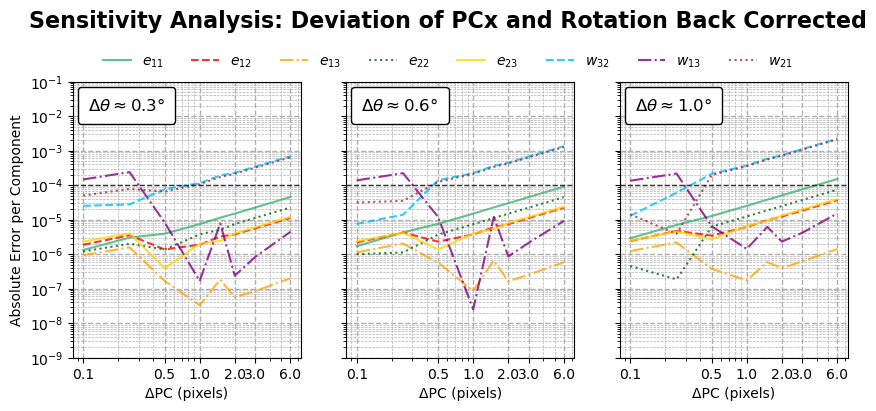

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',
}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_pcx_error, e12_pcx_error, e13_pcx_error,
          e22_pcx_error, e23_pcx_error, 
          w32_pcx_error, w13_pcx_error, w21_pcx_error]

column = [1, 2, 3]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], 
                            color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], 
                            color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e-1)


    ax[ax_idx].set_xlabel("ΔPC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error per Component")
        #the title of the leftmost subplot
        title = rf"$ \Delta \theta \approx 0.3 \degree$"

    elif ax_idx == 1:
        title = r"$ \Delta \theta \approx 0.6 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \Delta \theta \approx 1.0 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of PCx and Rotation Back Corrected", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_PCx_and_Rotation_backcorrected.png', dpi=300)
plt.show()

## PC y 

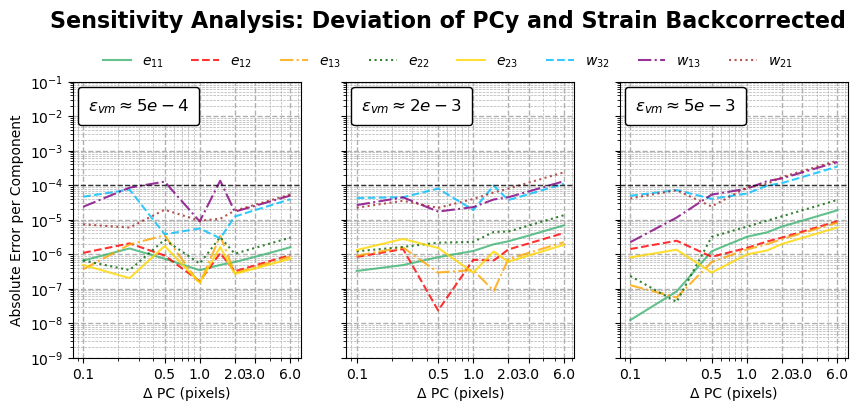

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',

}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_pcy_error, e12_pcy_error, e13_pcy_error,
          e22_pcy_error, e23_pcy_error, 
          w32_pcy_error, w13_pcy_error, w21_pcy_error]

column = [5, 8, 9]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e-1)


    ax[ax_idx].set_xlabel("Δ PC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error per Component")
        #the title of the leftmost subplot
        title = r"$ \epsilon_{vm} \approx 5e-4$"

    elif ax_idx == 1:
        title = r"$ \epsilon_{vm} \approx 2e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \epsilon_{vm} \approx 5e-3$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of PCy and Strain Backcorrected", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_PCy_and_Strain_backcorrected.png', dpi=300)
plt.show()

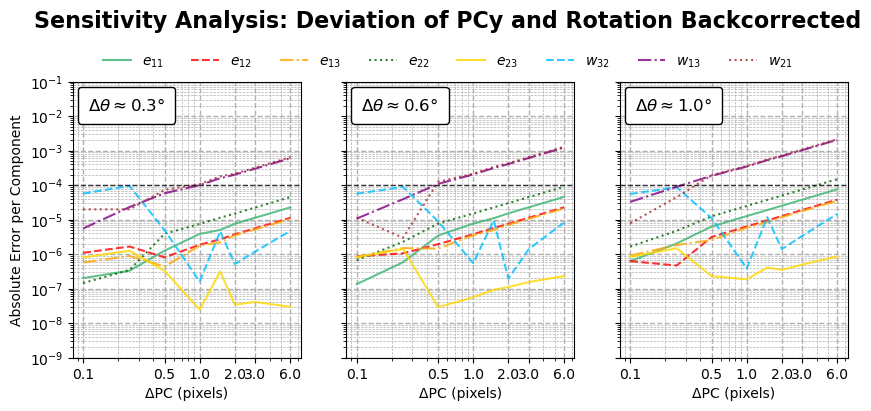

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# define component order, labels and a consistent color map
components = ['e11', 'e12', 'e13', 'e22', 'e23', 'w32', 'w13', 'w21']
labels = [r'$e_{11}$', r'$e_{12}$', r'$e_{13}$', r'$e_{22}$', r'$e_{23}$', r'$w_{32}$', r'$w_{13}$', r'$w_{21}$']
color_map = {
    'e11': 'mediumseagreen',
    'e12': 'red',
    'e13': 'orange',
    'e22': 'darkgreen',
    'e23': 'gold',
    'w32': 'deepskyblue',
    'w13': 'purple',
    'w21': 'brown',

}

# Add different line styles to distinguish overlapping lines
linestyle_map = {
    'e11': '-',      # solid
    'e12': '--',     # dashed
    'e13': '-.',     # dash-dot
    'e22': ':',      # dotted
    'e23': '-',      # solid
    'w32': '--',     # dashed
    'w13': '-.',     # dash-dot
    'w21': ':',      # dotted
}

# arrays for each component (must exist in the notebook scope)
arrays = [e11_pcy_error, e12_pcy_error, e13_pcy_error,
          e22_pcy_error, e23_pcy_error, 
          w32_pcy_error, w13_pcy_error, w21_pcy_error]

column = [1, 2, 3]   # the row indices plotted in your three subplots

for ax_idx, col in enumerate(column):
    for comp_idx, comp in enumerate(components):
        y = arrays[comp_idx][:, col]
        # only set the label on the first subplot so legend entries are unique
        if ax_idx == 0:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], label=labels[comp_idx], color=color_map[comp], linewidth=1.5, alpha=0.8)
        else:
            ax[ax_idx].loglog(x_axis, y, linestyle=linestyle_map[comp], color=color_map[comp], linewidth=1.5, alpha=0.8)

    # Add horizontal dashed line at 1e-4
    ax[ax_idx].axhline(y=1e-4, color='black', linestyle='--', linewidth=1, alpha=0.7)

    ax[ax_idx].set_ylim(1e-9, 1e-1)


    ax[ax_idx].set_xlabel("ΔPC (pixels)")


    if ax_idx == 0:
        ax[ax_idx].set_ylabel("Absolute Error per Component")
        #the title of the leftmost subplot
        title = rf"$ \Delta \theta \approx 0.3 \degree$"

    elif ax_idx == 1:
        title = r"$ \Delta \theta \approx 0.6 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for middle
    else:
        title = r"$ \Delta \theta \approx 1.0 \degree$"
        ax[ax_idx].set_yticklabels([])   # hide y labels for rightmost

    at = AnchoredText(title,
                      loc='upper left',                # change to 'upper right' etc.
                      prop=dict(size=12, weight='bold'),
                      frameon=True)
    at.patch.set_boxstyle("round,pad=0.2")
    ax[ax_idx].add_artist(at)

    ax[ax_idx].grid(which='both', axis='both', linestyle='--', linewidth=0.5)
    # make the major grid lines more prominent
    ax[ax_idx].grid(which='major', axis='both', linestyle='--', linewidth=1.0)


    ax[ax_idx].set_xticks([0.1, 0.5, 1.0, 2.0, 3.0, 6.0])
    ax[ax_idx].set_xticklabels(['0.1', '0.5', '1.0', '2.0', '3.0', '6.0'])

fig.suptitle(f"Sensitivity Analysis: Deviation of PCy and Rotation Backcorrected", fontsize=16, fontweight='bold', y=0.98)


# collect handles/labels from the first axis (unique)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=9, frameon=False)
plt.subplots_adjust(top=0.80)
plt.savefig(f'{foldername}/Relative_Error_PCy_and_Rotation_backcorrected.png', dpi=300)
plt.show()